# Задача 1. Сделать реверс односвзяного списка.

*Пример: 
Входные данные: 1, 2, 3, 4, 5. 
Результат: 5, 4, 3, 2, 1*


In [1]:
class Node():
    def __init__(self, data):
        self.data = data
        self.next = None
        
class linked_list():
    def __init__(self):
        self.header = None

    def append_node(self, data):
        if self.header :
            cur_node = self.header
            while cur_node.next:
                cur_node = cur_node.next
            cur_node.next = Node(data)
        else:
            self.header = Node(data)
    
    def print_list(self):
        curr = self.header
        print('start', end=" -> ")
        while curr:
            print(curr.data, end=" -> ")
            curr = curr.next
        print('end')
# затраты по памяти - константа O(1)
# оценка сложности - O(n)
    def reverse_list(self):
        prev = None
        curr = self.header
        while curr and curr.next:
            next = curr.next
            curr.next = prev
            prev = curr
            curr = next
        self.header = curr
        self.header.next = prev

In [2]:
a = linked_list()
a.append_node(5)
a.append_node(55)
a.append_node(355)
a.print_list()
a.reverse_list()
a.print_list()

start -> 5 -> 55 -> 355 -> end
start -> 355 -> 55 -> 5 -> end


# Задача 4

У вас есть данные о ценах акций за n дней в виде массива prices. Вы можете совершить не более k сделок (покупка + продажа = 1 сделка).

Найдите максимальную прибыль, которую можно получить, соблюдая правила:
- Нельзя совершать несколько сделок одновременно (нельзя купить и продать в один и тот же день)
- Нельзя покупать, если уже есть купленные акции
- Можно совершать любое количество сделок, но не более k

Пример:

prices = [3, 2, 6, 5, 0, 3], k = 2

Максимальная прибыль: 7

Объяснение: 

Покупка в день 2 (цена 2), продажа в день 3 (цена 6) → прибыль 4

Покупка в день 5 (цена 0), продажа в день 6 (цена 3) → прибыль 3

Итого: 4 + 3 = 7


In [ ]:
prices, k = [3, 2, 6, 5, 0, 3], 2

<BarContainer object of 7 artists>

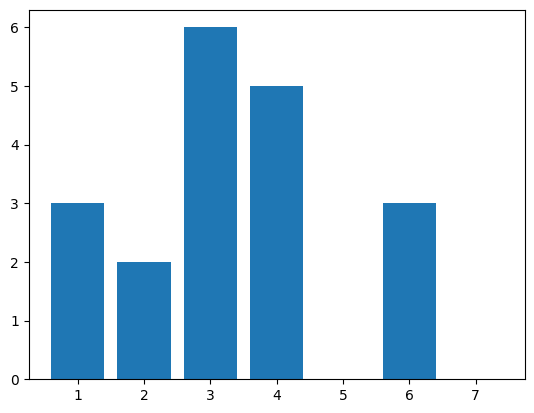

In [35]:
import matplotlib.pyplot as plt
plt.bar(range(1,len(prices)+1),prices)

In [59]:
def dynamic_max(prices, k):
    n = len(prices)
    df = [[0] * n for _ in range(k+1)]
    for i in range(1, k + 1):
        max_diff = -prices[0] 
        for j in range(1, n):
            df[i][j] = max(df[i][j - 1], prices[j] + max_diff)
            max_diff = max(max_diff, df[i - 1][j] - prices[j])
    for i in df:
        print(i)
    return df[k][n - 1]

In [60]:
print(prices)
dynamic_max(prices,k)

[3, 2, 6, 5, 0, 3, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 4, 4, 4, 4]
[0, 0, 4, 4, 4, 7, 7]


7